# Aliasing

This notebook illustrates aliasing, which occurs when a high frequency Fourier component is evaluated on a grid that is too coarse to represent it, and agrees with a lower frequency Fourier mode on the grid.

If we have a grid with $N$ nodes $x_j = 2\pi j/N$ (and suppose $N$ is even), then the highest wavenumber that can be represented by a Fourier mode of the form $e^{ikx}$ on this grid is $k = \pm N/2$.  This is the "sawtooth" mode since $e^{i(\pm N/2)x_j} = e^{\pm i\pi j} = \left(e^{\pm i\pi}\right)^j = (-1)^j$. 

If $k_1$ and $k_2$ differ by an integer multiple of $N$, then the two are indistinguishable on a grid of $N$ points, since $k_2 = k_1 + mN$ implies that $e^{ik_2x_j} = e^{ik_1x_j + imNjh} = e^{ik_1x_j} \left(e^{2\pi i}\right)^m = e^{ik_1x_j}$.

The code below illustrates this for $\sin(k_2 x)$, the imaginary part of the complex exponential (see also Figure 2.1 in SMM).

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
N = 10
h = 2*pi/N
x = linspace(h, 2*pi, N)
x_fine = linspace(0, 2*pi, 1000)

def alias_plot(k1):
    # assumes k1 > 0
    k2 = mod(k1, N)
    if k2>N/2: 
        k2 = k2-N
    figure(figsize=(10,5))
    plot(x_fine, sin(k1*x_fine),'b')
    plot(x, sin(k1*x), 'bo')
    plot(x_fine, sin(k2*x_fine), 'r')
    xlim(0, 2*pi)
    title('sin(%s x) (blue) and sin(%s x) (red)' % (k1,k2))
    

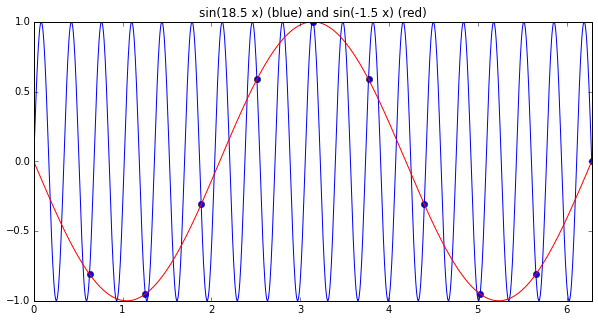

In [3]:
alias_plot(18.5)

In [4]:
from ipywidgets import interact

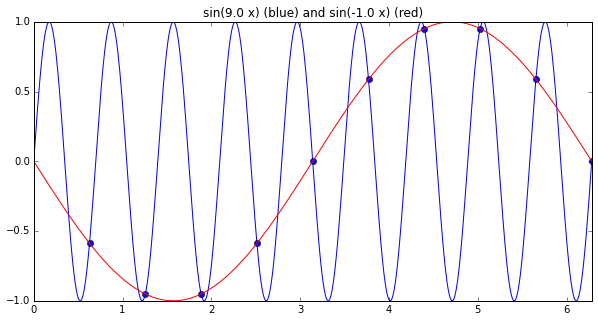

In [5]:
interact(alias_plot, k1=(4,15,0.5))